In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Importing the dataset
diamond_dataset = pd.read_csv('D://kaggle//diamondstudy//diamonds.csv',index_col=0)
diamond_dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond_dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
diamond_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


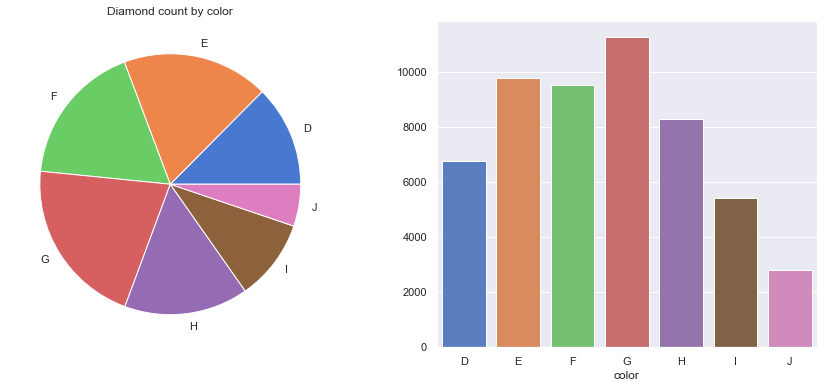

In [26]:
# EDA
color = diamond_dataset.groupby(['color']).size()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
color.plot.pie(label='',title='Diamond count by color')

plt.subplot(1,2,2)
sns.barplot(diamond_dataset.groupby(['color']).size().index,diamond_dataset.groupby(['color']).size().values)


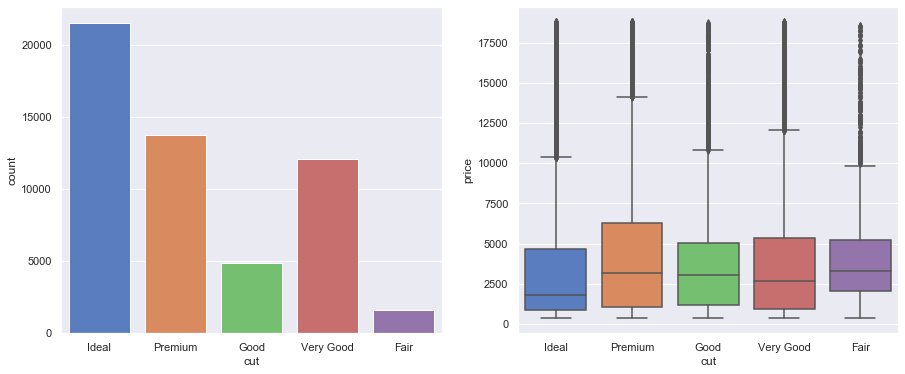

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(diamond_dataset['cut'])

plt.subplot(1,2,2)
sns.boxplot(diamond_dataset['cut'],diamond_dataset['price'])

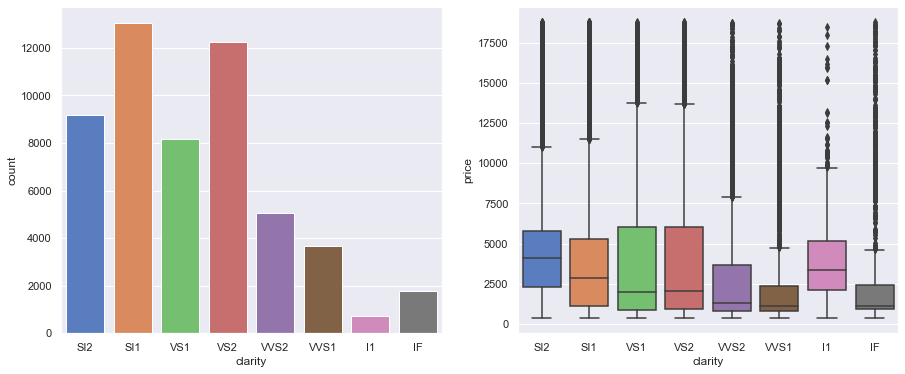

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(diamond_dataset['clarity'])

plt.subplot(1,2,2)
sns.boxplot(diamond_dataset['clarity'],diamond_dataset['price'])

In [34]:
diamond_dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [42]:
#count zeros for x, y and z
print("Zeros in x : {}, y : {} , z : {}".format((diamond_dataset['x'] == 0).sum(),(diamond_dataset['y'] == 0).sum(),(diamond_dataset['z'] == 0).sum()))

Zeros in x : 8, y : 7 , z : 20


In [44]:
#replacing zeros with NaN and dropping the values as length, weight and depth cant be zero
diamond_dataset[['x','y','z']] = diamond_dataset[['x','y','z']].replace(0,np.NaN)
diamond_dataset.dropna(inplace=True)

In [46]:
diamond_dataset.shape

(53920, 10)

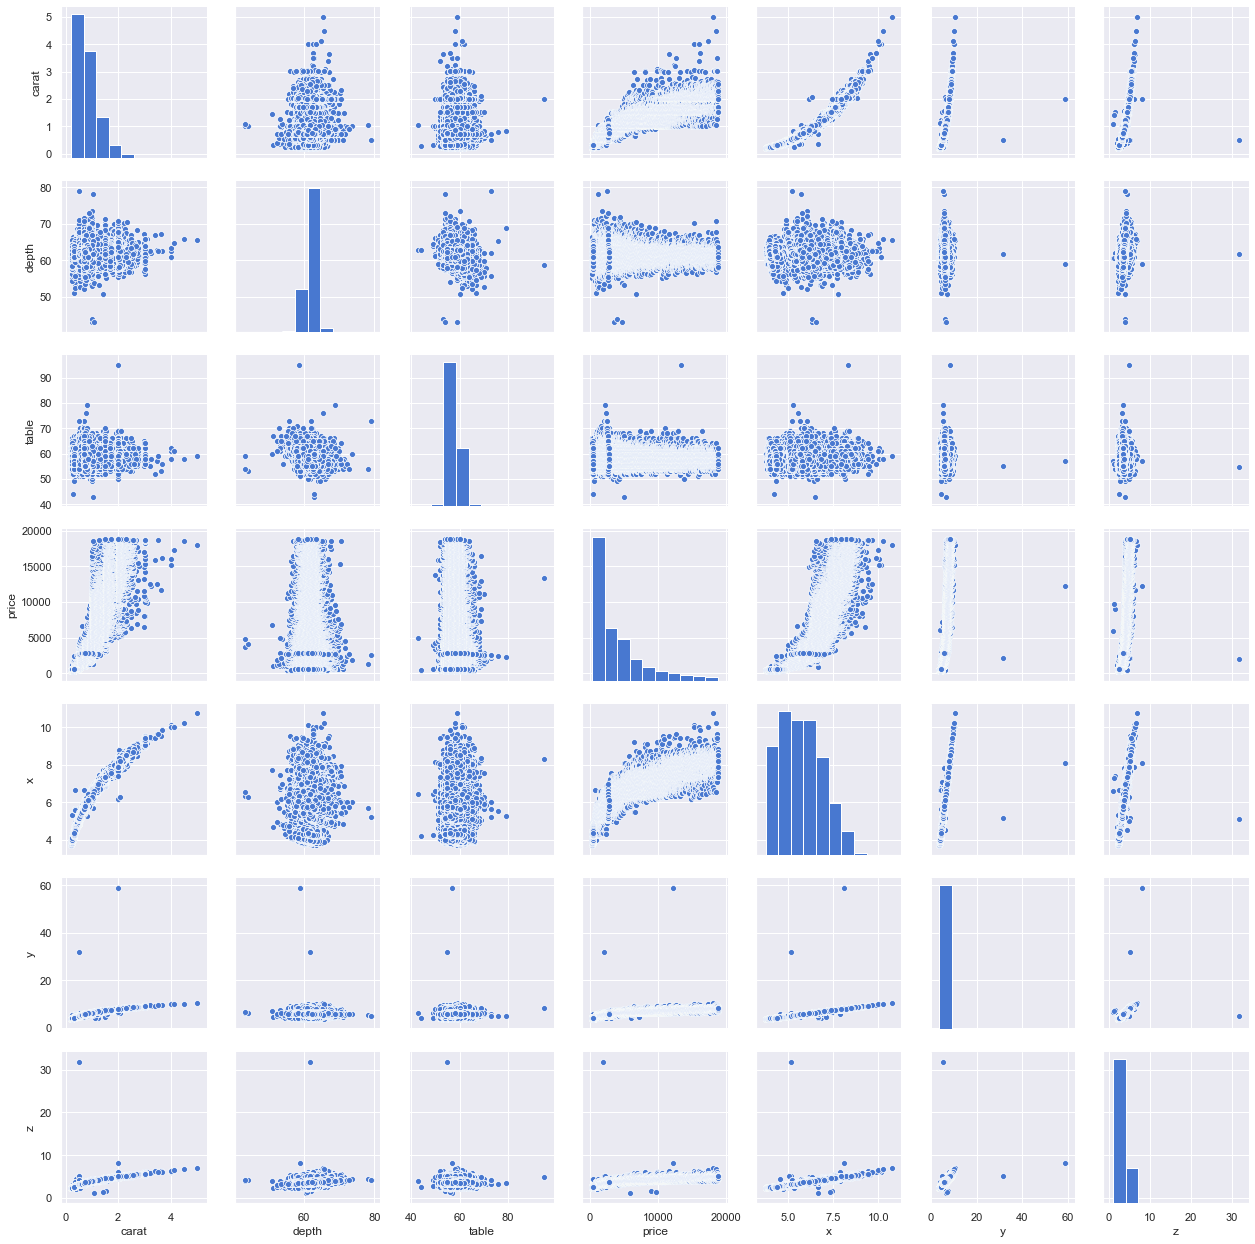

In [47]:
sns.pairplot(diamond_dataset)

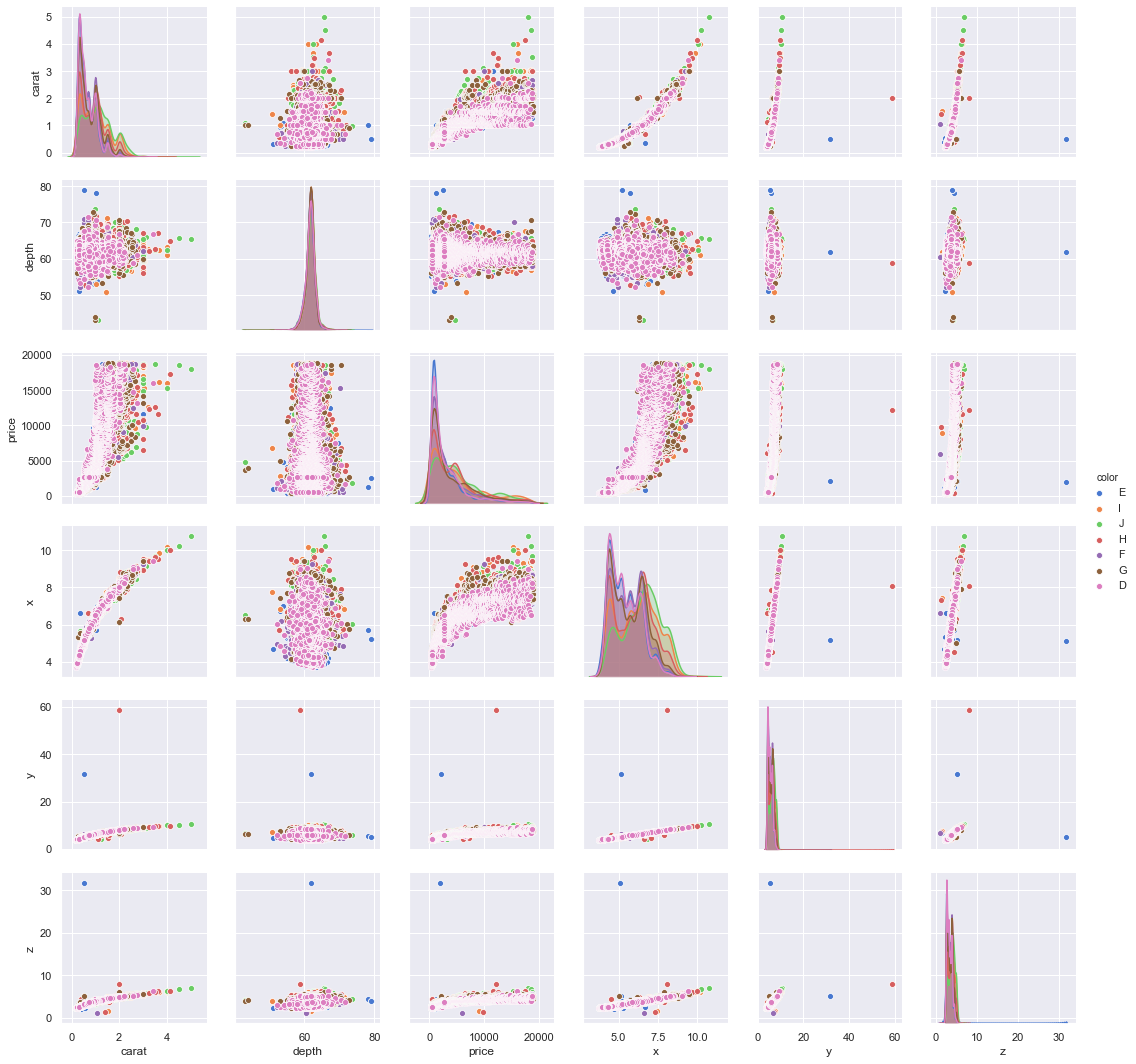

In [59]:
sns.pairplot(data=diamond_dataset,hue='color',vars=['carat','depth','price','x','y','z'])

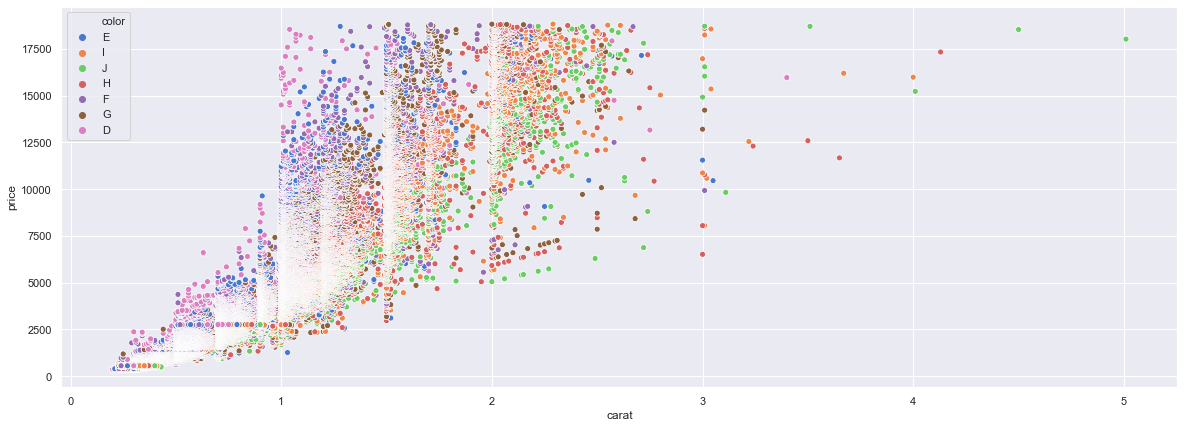

In [52]:
plt.figure(figsize=(20,7))

sns.set_palette("muted")
ax = sns.scatterplot('carat','price',hue='color',data=diamond_dataset)

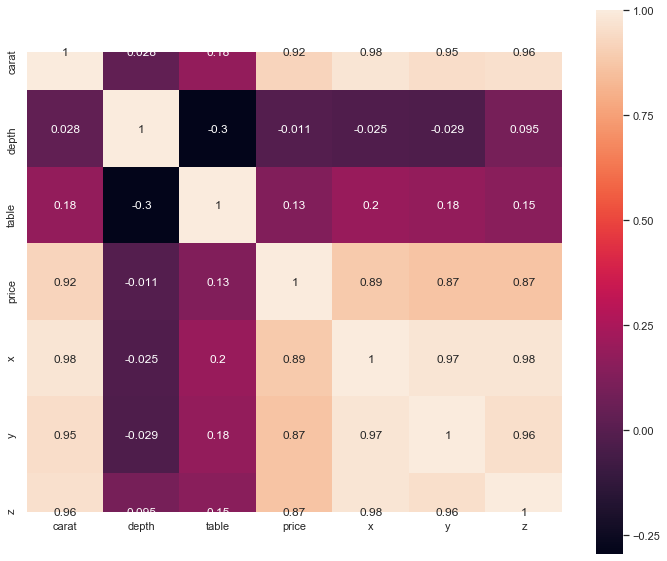

In [58]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_dataset.corr(),annot=True,square=True)

In [60]:
diamond_dataset.skew()

carat    1.116207
depth   -0.081726
table    0.796799
price    1.618349
x        0.398348
y        2.462211
z        1.585490
dtype: float64

In [74]:
#scaling the data
#Categorical data

one_hot_encoded = pd.get_dummies(diamond_dataset)
cols = one_hot_encoded.columns
diamond_onehot_dataset = pd.DataFrame(one_hot_encoded,columns= cols)
diamond_onehot_dataset.head()


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [75]:
#Numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(scaler.fit_transform(diamond_onehot_dataset[['carat','depth','table','x','y','z']]),
                                   columns=['carat','depth','table','x','y','z'],index=diamond_onehot_dataset.index)
diamond_clean_dataset = diamond_onehot_dataset.copy(deep=True)
diamond_clean_dataset[['carat','depth','table','x','y','z']] = scaled_numeric_data[['carat','depth','table','x','y','z']]
diamond_clean_dataset.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


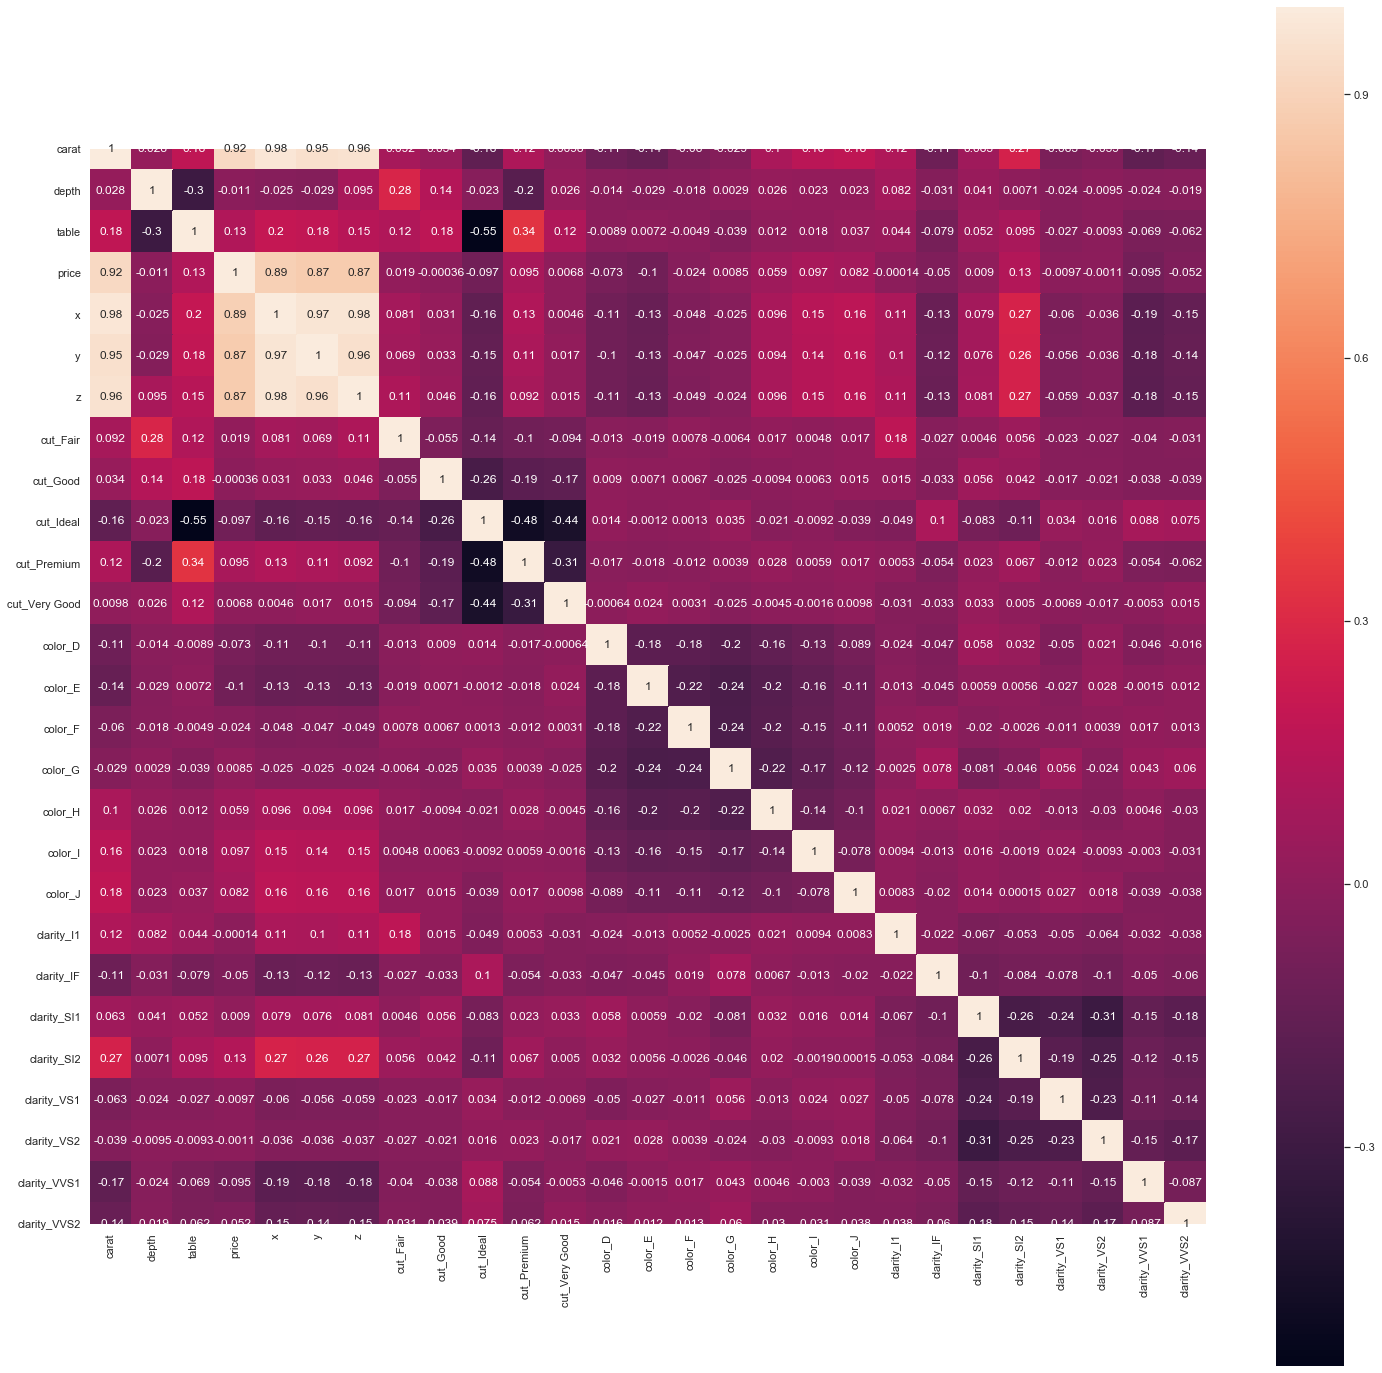

In [77]:
plt.figure(figsize=(25,25))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(diamond_clean_dataset.corr(),annot=True,square=True)

In [78]:
# splitting the target (Price) from the dataset
x = diamond_clean_dataset.drop(['price'],axis=1)
y = diamond_clean_dataset['price']

In [79]:
# splitting the data and targets into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.2)

In [84]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

print("accuracy: {:0.2f}".format(linreg.score(x_train,y_train)*100))

accuracy: 91.86


In [85]:
pred = linreg.predict(x_test)
print("accuracy: {:0.2f}".format(linreg.score(x_test,y_test)*100))

accuracy: 91.95


In [87]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test,pred)
print('R Squared: {}'.format(R2))

R Squared: 0.9195127194882515


In [89]:
Rsquare_score.append(R2)

In [104]:
Models = ['Linear Regression','Lasso Regression','Random Forest Regressor']
Rsquare_score =[]

In [90]:
#Lasso Regression
from sklearn.linear_model import Lasso

lreg = Lasso(normalize=True)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

R2 = r2_score(y_test,pred)
print('R Squared: {}'.format(R2))

R Squared: 0.8800966384684155


In [91]:
Rsquare_score.append(R2)

In [92]:
Rsquare_score

[0.9195127194882515, 0.8800966384684155]

In [95]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print("accuracy: {:0.2f}".format(linreg.score(x_test, y_test)*100))
R2 = r2_score(y_test,pred)
print('R Squared: {}'.format(R2))

accuracy: 91.95
R Squared: 0.9830605305367139


In [96]:
Rsquare_score.append(R2)

In [111]:
modelR2 = pd.DataFrame({'models':Models,'R square':Rsquare_score})
modelR2.sort_values(['R square'],ascending=False)

,models,R square
2,Random Forest Regressor,0.983061
0,Linear Regression,0.919513
1,Lasso Regression,0.880097


In [118]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.699e+04
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:33:32   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53896   BIC:                         9.111e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2294.9376      6.679    343.627      0.000    2281.848    2308.028
carat          5460.7579     24.462    223.235      0.000    5412.812    5508.703
depth           -93.2107      6.644    -14.029      0.000    -106.233     -80.188
table           -59.0772      6.491     -9.102      0.000     -71.799     -46.355
x             -1232.1165     39.171    -31.455      0.000   -1308.893   -1155.341
y                29.5666     22.172      1.334      0.182     -13.890      73.023
z               -80.7768     26.583     -3.039      0.002    -132.880     -28.673
cut_Fair       -114.9354     25.534     -4.501      0.000    -164.981     -64.889
cut_Good        459.4552     14.752     31.146      0.000     430.542     488.368
cut_Ideal       709.9431     11.321     62.712      0.000     687.754     732.132
cut_Premium     638.0686     10.684     59.724      0.000     617.129     659.009
cut_Very Good   602.4060     10.676     56.426      0.000     581.481     623.331
color_D        1153.4995     13.106     88.015      0.000    1127.812    1179.187
color_E         944.5963     11.215     84.227      0.000     922.615     966.578
color_F         886.0969     11.150     79.470      0.000     864.243     907.951
color_G         676.3244     10.474     64.571      0.000     655.795     696.854
color_H         173.7411     11.764     14.769      0.000     150.684     196.798
color_I        -316.7539     14.261    -22.211      0.000    -344.706    -288.802
color_J       -1222.5666     19.366    -63.130      0.000   -1260.524   -1184.610
clarity_I1    -3532.3768     38.060    -92.810      0.000   -3606.975   -3457.778
clarity_IF     1807.9003     24.938     72.497      0.000    1759.022    1856.778
clarity_SI1     145.3856     11.310     12.855      0.000     123.218     167.553
clarity_SI2    -815.6870     13.012    -62.686      0.000    -841.191    -790.183
clarity_VS1    1054.6669     13.015     81.034      0.000    1029.157    1080.177
clarity_VS2     743.9698     11.371     65.425      0.000     721.682     766.258
clarity_VVS1   1471.6332     18.243     80.669      0.000    1435.877    1507.389
clarity_VVS2   1419.4455     15.760     90.064      0.000    1388.555    1450.336
==============================================================================
Omnibus:                    14447.606   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637923.673
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.816   Cond. No.                     6.92e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.49e-27. This 

In [119]:
# removing y column from the dataset as it is less significant
newx = x.drop(['y'],axis=1)
x1 = sm.add_constant(newx)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:34:01   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53897   BIC:                         9.111e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2294.8033      6.678    343.643      0.000    2281.715    2307.892
carat          5461.3578     24.458    223.296      0.000    5413.420    5509.296
depth           -94.0748      6.613    -14.227      0.000    -107.036     -81.114
table           -59.2309      6.490     -9.127      0.000     -71.951     -46.510
x             -1208.9309     35.101    -34.441      0.000   -1277.730   -1140.132
z               -75.5041     26.288     -2.872      0.004    -127.029     -23.980
cut_Fair       -115.9251     25.523     -4.542      0.000    -165.950     -65.900
cut_Good        459.9913     14.746     31.194      0.000     431.089     488.894
cut_Ideal       710.1280     11.320     62.733      0.000     687.941     732.315
cut_Premium     637.4627     10.674     59.721      0.000     616.542     658.384
cut_Very Good   603.1463     10.662     56.572      0.000     582.250     624.043
color_D        1153.4708     13.106     88.013      0.000    1127.783    1179.158
color_E         944.6103     11.215     84.227      0.000     922.629     966.592
color_F         886.0855     11.150     79.468      0.000     864.231     907.940
color_G         676.2857     10.474     64.567      0.000     655.756     696.815
color_H         173.7618     11.764     14.771      0.000     150.704     196.819
color_I        -316.8024     14.261    -22.215      0.000    -344.754    -288.851
color_J       -1222.6084     19.366    -63.132      0.000   -1260.566   -1184.651
clarity_I1    -3533.1209     38.056    -92.839      0.000   -3607.712   -3458.530
clarity_IF     1808.1168     24.937     72.507      0.000    1759.240    1856.994
clarity_SI1     145.4078     11.310     12.857      0.000     123.240     167.575
clarity_SI2    -815.6680     13.012    -62.685      0.000    -841.172    -790.164
clarity_VS1    1054.8099     13.015     81.047      0.000    1029.301    1080.319
clarity_VS2     743.9744     11.371     65.425      0.000     721.686     766.262
clarity_VVS1   1471.7206     18.243     80.674      0.000    1435.965    1507.477
clarity_VVS2   1419.5626     15.760     90.072      0.000    1388.672    1450.453
==============================================================================
Omnibus:                    14444.305   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638508.611
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.824   Cond. No.                     5.00e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-27. This might indicate that there are
strong multicollinearity problems or that the design